# Fashion-MNIST

## 데이터셋 불러오기

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root='data',  # 학습 데이터 저장경로
    train=True,  # 학습용 데이터셋
    download=True,  # root에 데이터가 없는 경우 다운로드
    transform=ToTensor()  # 데이터 변형 지정
)

test_data = datasets.FashionMNIST(
    root='data',  # 테스트 데이터 저장경로
    train=False,  # 테스트용 데이터셋
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:07<00:00, 3761956.02it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 99808.42it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:11<00:00, 374029.23it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]


Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



## 데이터셋 순회 및 시각화
Dataset에 리스트처럼 index로 직접접근 가능

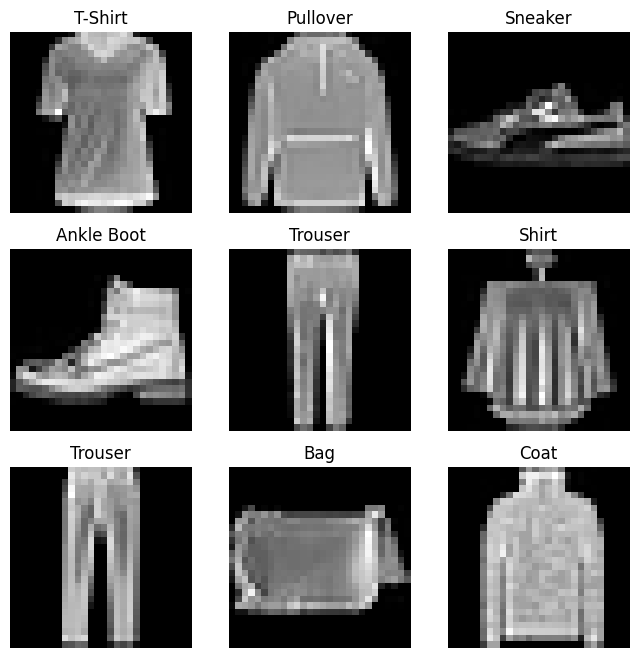

In [2]:
# training_data[index].matplotlib을 사용해 학습데이터 일부 시각화
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
    # 텐서의 모든 값을 하나로 집계(aggregate)하여 요소가 하나인 텐서의 경우, item()로 Python 숫자 값으로 변환가능
    # torch.randint(): 주어진 범위 내의 정수를 균등하게 생성
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## 파일에서 사용자 정의 데이터셋 만들기

In [4]:
import os
import pandas as pd
from torchvision.io import read_image


class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    # 데이터셋의 샘플 개수 반환
    def __len__(self):
        return len(self.img_labels)

    # 주어진 인덱스 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)  # 이미지를 텐서로 변환
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


## DataLoader로 학습용 데이터 준비하기
- Dataset: 데이터셋의 feature를 가져와 샘플의 label을 연결하는 일을 한 번에 처리
- 학습시 샘플들을 미니배치로 전달하고, 매 에폭마다 데이터를 다시 shuffle해서 과적합을 방지
- 파이썬의 multiprocessing을 사용해 검색속도를 높임
- DataLoader: 간단한 API로 복잡한 과정들을 추상화한 순회 가능한 객체

In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## DataLoader를 통해 순회하기(iterate)
- 데이터셋을 불러온 뒤에는 필요에 따라 iteration가능
- next(iter()): batch size에 해당하는 피쳐값과 라벨값의 batch를 반환
    - 예) train_features, train_labels = next(iter(train_dataloader))
- 모든 배치를 순회한 후 데이터가 섞임

Features batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


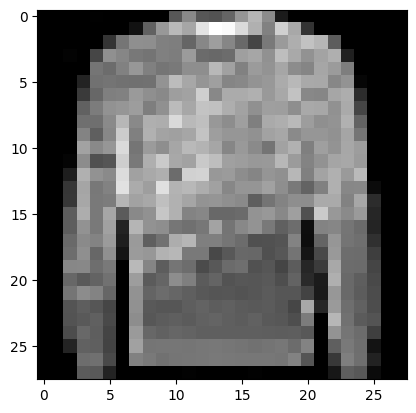

Label: [0]


In [6]:
# 이미지와 정답을 표시
train_features, train_labels = next(iter(train_dataloader))
print(f'Features batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze()  # 맨앞 배치사이즈 차원 없애고 이미지 텐서 뽑아내는 듯
label = train_labels=[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {label}')